# Physionet LTDB: Wandering baseline example

Data from https://physionet.org/content/ltdb/1.0.0/

In [1]:
import wfdb
import matplotlib.pyplot as plt
import locomotif.locomotif as locomotif
from locomotif.visualize import plot_motif_sets
from dtaidistance.preprocessing import differencing

In [2]:
# Download data directly from the website
record = wfdb.rdrecord('14149', pn_dir='ltdb/1.0.0')

# Reuse stored data
# record = wfdb.rdrecord('rsrc/physionet-ltdb/14149')

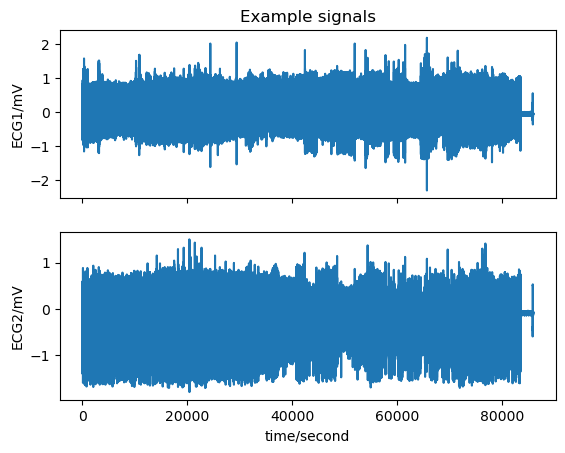

In [3]:
wfdb.plot_wfdb(record=record, title='Example signals')

We will take a snapshot out of the full series where there is a clear wandering baseline

In [4]:
series = record.p_signal[49630:50500,0]

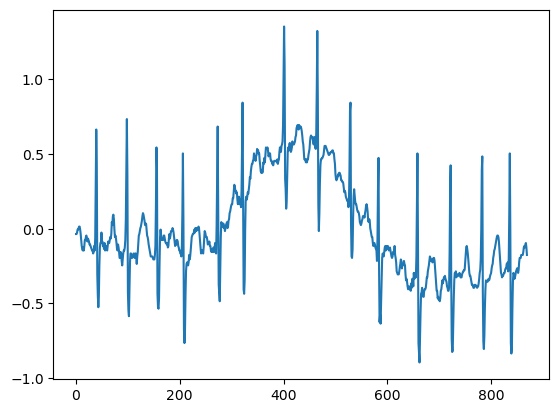

In [5]:
plt.plot(series)

To be able to deal with baseline wandering we will make use of differencing and a low pass filter. After applying differencing, LoCoMotif finds the motif set perfectly.

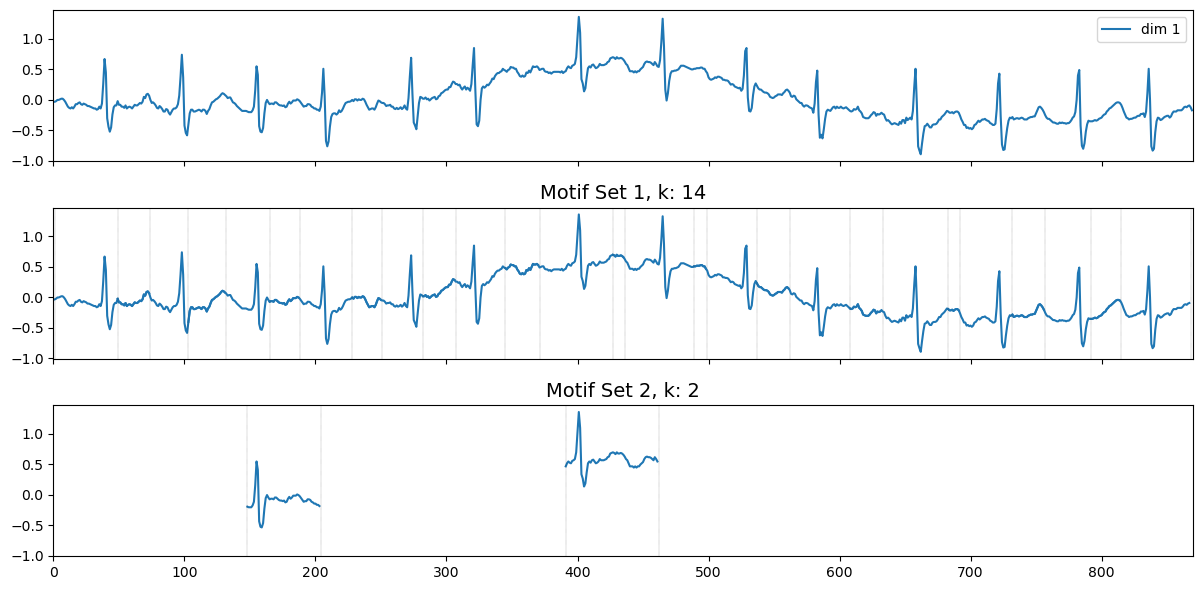

In [6]:
rho = 0.25
nb_motifs = 10
l_min = 70
l_max = 110
overlap = 0.50

seriesd = differencing(series, smooth=0.1)
# seriesd = series

motif_sets = locomotif.apply_locomotif(seriesd, l_min, l_max, rho, nb_motifs, overlap=overlap)
fig, ax = plot_motif_sets(series, motif_sets)
fig.show()

In the plot above, we show the original data. Underneath you can see the differenced signals and where the motifs are found (every beat is a motif).

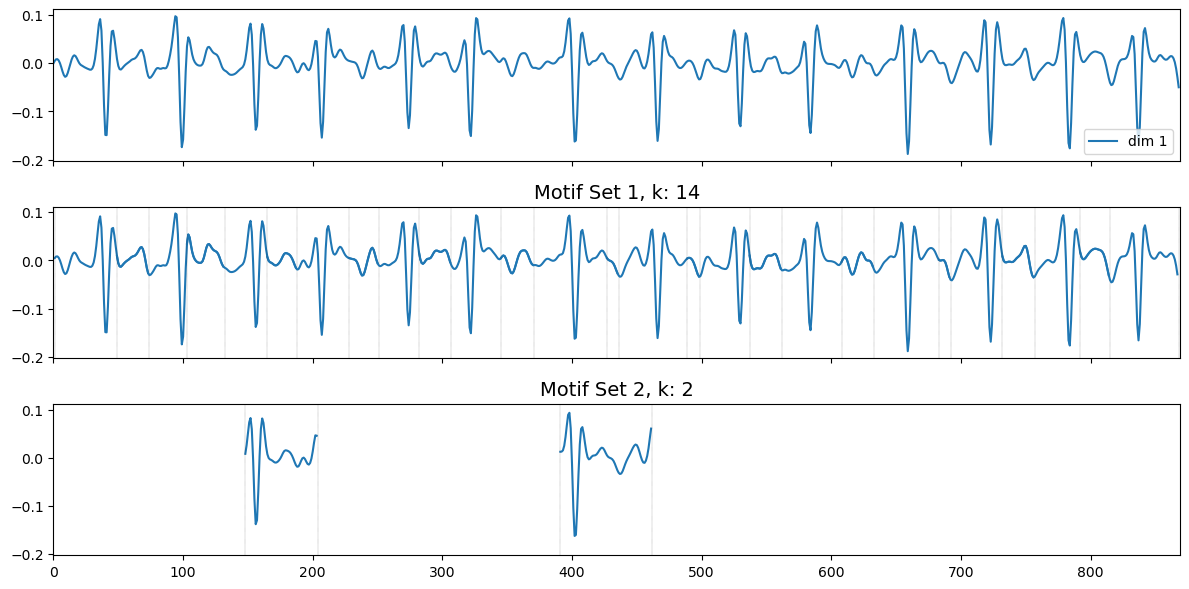

In [7]:
fig, ax = plot_motif_sets(seriesd, motif_sets)
fig.show()

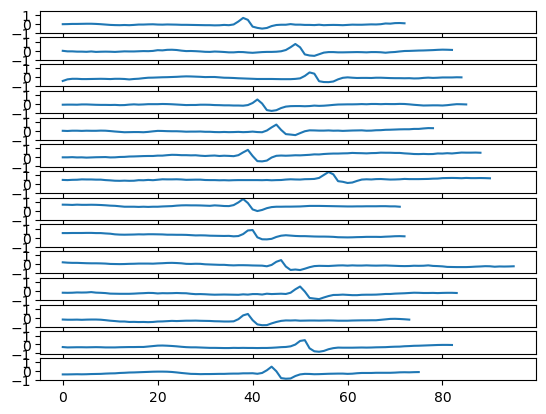

In [8]:
_, motif_set = motif_sets[0]
fig, axs = plt.subplots(nrows=len(motif_set), ncols=1, sharex=True, sharey=True)
for pi, (bi, ei) in enumerate(motif_set):
    axs[pi].plot(series[bi:ei])